In [1]:
#Imports
import sys
sys.path.append("../")
import numpy
import matplotlib
from classes import ModelWrapper, DataLoader, Cluster, Vector

#Interactive matplotlib plots
%matplotlib widget

2024-04-04 16:29:41.945389: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Initialisation
modelAPI = ModelWrapper.loadPostprocessed("../models/3D/small", "paralel")
track_type = "alltracks"
data_loader = DataLoader("../data")
noisy = data_loader.getBatch(True, True, track_type=track_type, normalising=True)
noisy_with_E = data_loader.getBatch(True, True, track_type=track_type, normalising=False)
clean = data_loader.getBatch(True,False, track_type=track_type)
classified = modelAPI.classify( modelAPI.evaluateBatch(noisy) )
good_NN = Cluster.getGoodFromDataset(classified, noisy_with_E)
names = data_loader.getX17Names(track_type)

2024-04-04 16:29:48.107153: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


21/21 [==============================] - 4s 167ms/step


In [3]:
def getEnergies(data :numpy.ndarray, clusterConditionFunc):
	energy_density = []
	energy = []

	for i in range(data.shape[0]):
		for cluster in Cluster.clusterise(data[i]):
			cluster.setEnergy(noisy_with_E[i])
			cluster.runTests()
			if clusterConditionFunc(cluster):
				energy_density.append(cluster.energy / cluster.length)
				for coord in cluster.coords:
					energy.append(noisy_with_E[i][coord])
	
	return (energy_density, energy)

In [4]:
#Noisy
cluster_densities, _ = getEnergies(noisy, lambda x: True)
fig, ax = matplotlib.pyplot.subplots(1)
bin_heights, bin_borders, _ = ax.hist(cluster_densities, 60, log=False, density=False)
ax.set_title("Energy per Length, Noisy Data")
ax.set_xlabel(r"$\frac{E}{L}$")
ax.set_ylabel("#")
ax.set_ylim(0,120)
ax.set_xlim(0,600)
bin_centers = bin_borders[:-1] + numpy.diff(bin_borders) / 2
bin_heights, bin_centers = bin_heights[10:], bin_centers[10:]
print( sum(bin_heights*bin_centers) / sum(bin_heights) )
#print( sum(energy) / len(energy) )

fig.set_size_inches(14, 7)
matplotlib.pyplot.show()

KeyboardInterrupt: 

303.14221052631575


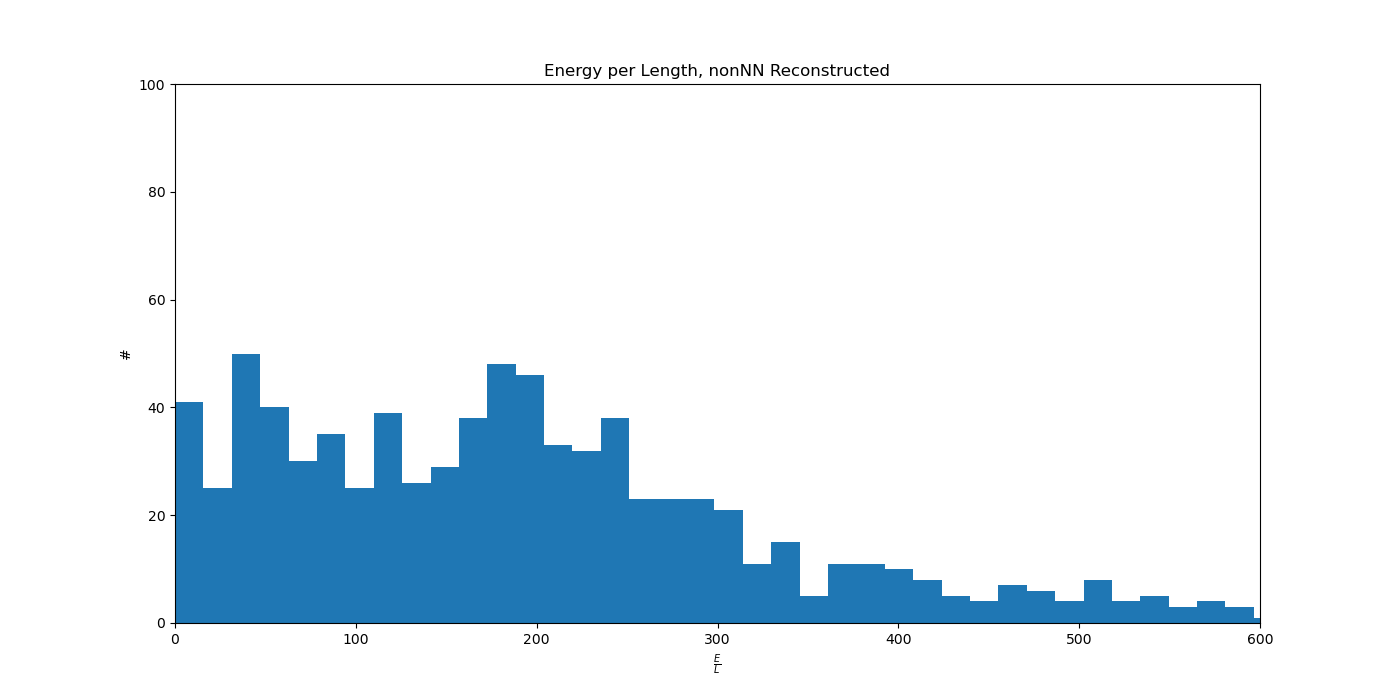

In [13]:
#nonNN
cluster_densities, _ = getEnergies(clean, lambda x: True)
fig, ax = matplotlib.pyplot.subplots(1)
bin_heights, bin_borders, _ = ax.hist(cluster_densities, 60, log=False, density=False)
ax.set_title("Energy per Length, nonNN Reconstructed")
ax.set_xlabel(r"$\frac{E}{L}$")
ax.set_ylabel("#")
ax.set_ylim(0,100)
ax.set_xlim(0,600)
bin_centers = bin_borders[:-1] + numpy.diff(bin_borders) / 2
bin_heights, bin_centers = bin_heights[10:], bin_centers[10:]
print( sum(bin_heights*bin_centers) / sum(bin_heights) )
#print( sum(energy) / len(energy) )

fig.set_size_inches(14, 7)
matplotlib.pyplot.show()

303.5549645390071


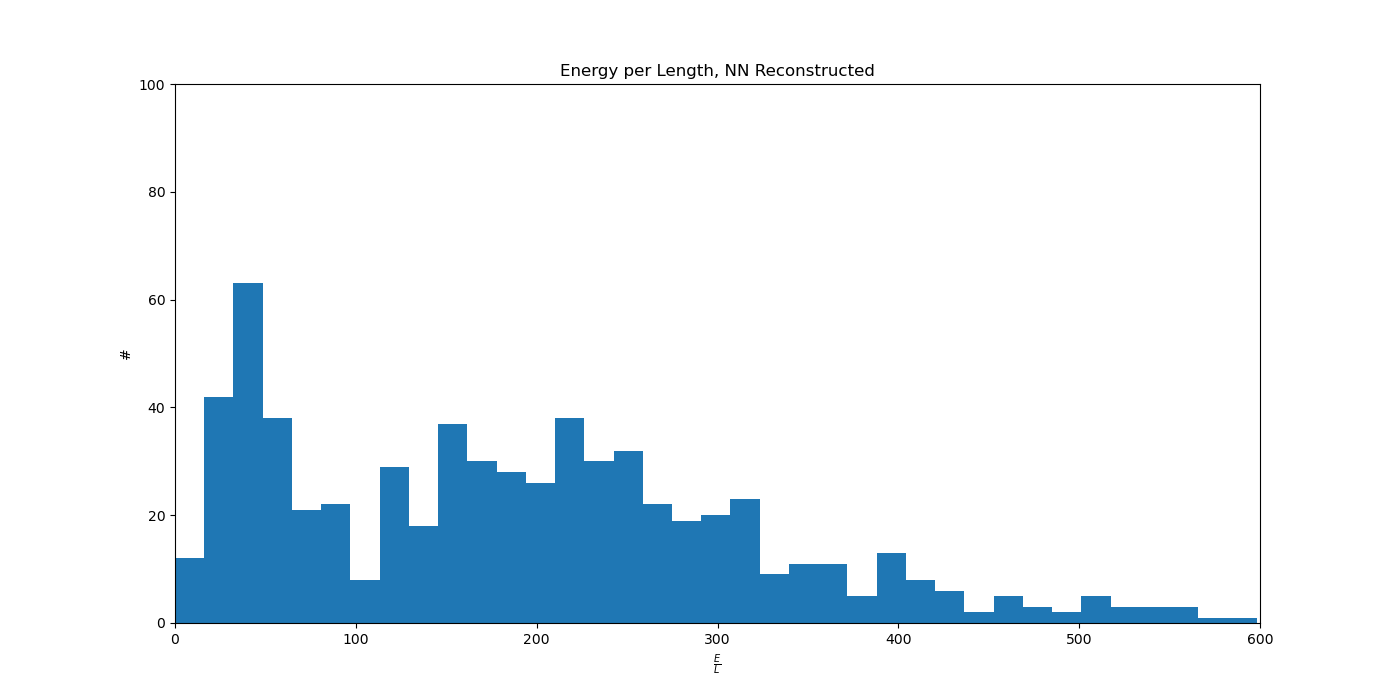

In [5]:
#NN
cluster_densities, _ = getEnergies(classified, lambda x: True)
fig, ax = matplotlib.pyplot.subplots(1)
bin_heights, bin_borders, _ = ax.hist(cluster_densities, 60, log=False, density=False)
ax.set_title("Energy per Length, NN Reconstructed")
ax.set_xlabel(r"$\frac{E}{L}$")
ax.set_ylabel("#")
ax.set_ylim(0,100)
ax.set_xlim(0,600)
bin_centers = bin_borders[:-1] + numpy.diff(bin_borders) / 2
bin_heights, bin_centers = bin_heights[10:], bin_centers[10:]
print( sum(bin_heights*bin_centers) / sum(bin_heights) )
#print( sum(energy) / len(energy) )

fig.set_size_inches(14, 7)
matplotlib.pyplot.show()

269.654613007445


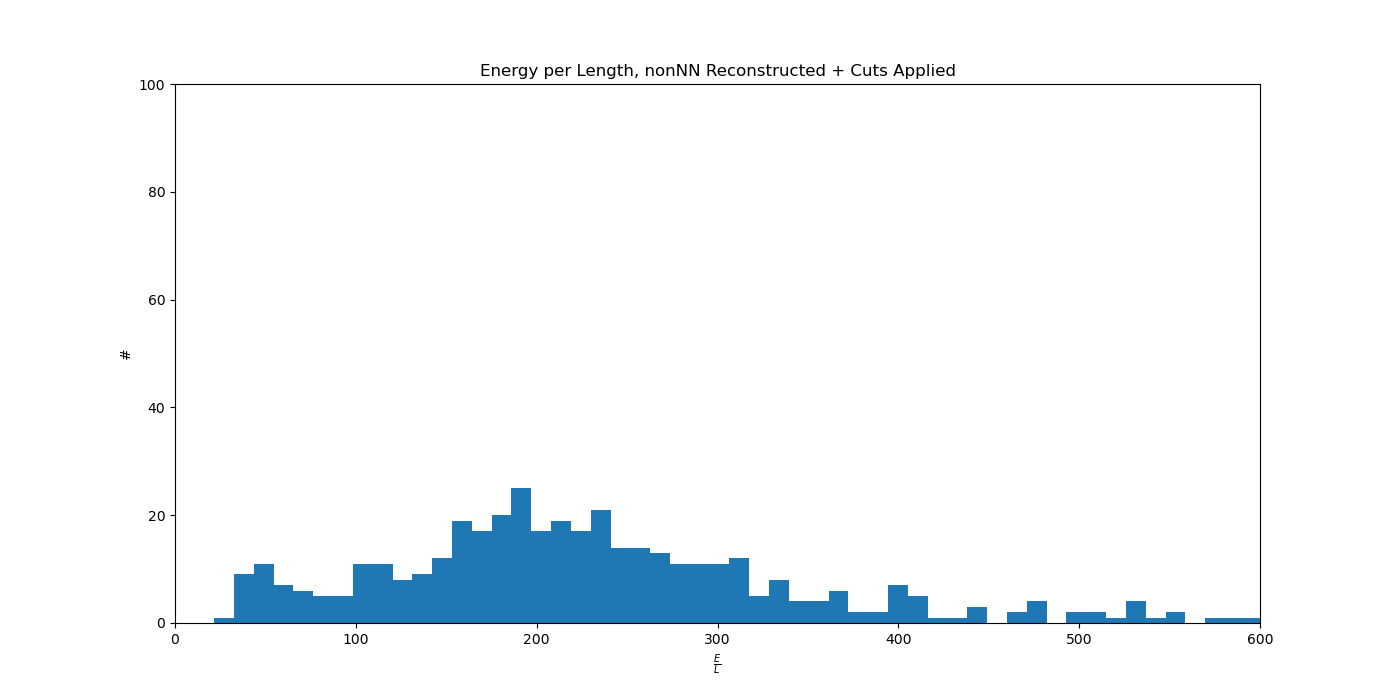

In [43]:
#nonNN + tests
cluster_densities, _ = getEnergies(clean, lambda x: all(x.tests[key] for key in ["length", "neighbours", "zone"]))
fig, ax = matplotlib.pyplot.subplots(1)
bin_heights, bin_borders, _ = ax.hist(cluster_densities, 60, log=False, density=False)
ax.set_title("Energy per Length, nonNN Reconstructed + Cuts Applied")
ax.set_xlabel(r"$\frac{E}{L}$")
ax.set_ylabel("#")
ax.set_ylim(0,100)
ax.set_xlim(0,600)
bin_centers = bin_borders[:-1] + numpy.diff(bin_borders) / 2
bin_heights, bin_centers = bin_heights[10:], bin_centers[10:]
print( sum(bin_heights*bin_centers) / sum(bin_heights) )
#print( sum(energy) / len(energy) )

fig.set_size_inches(14, 7)
matplotlib.pyplot.show()

253.1593054381515


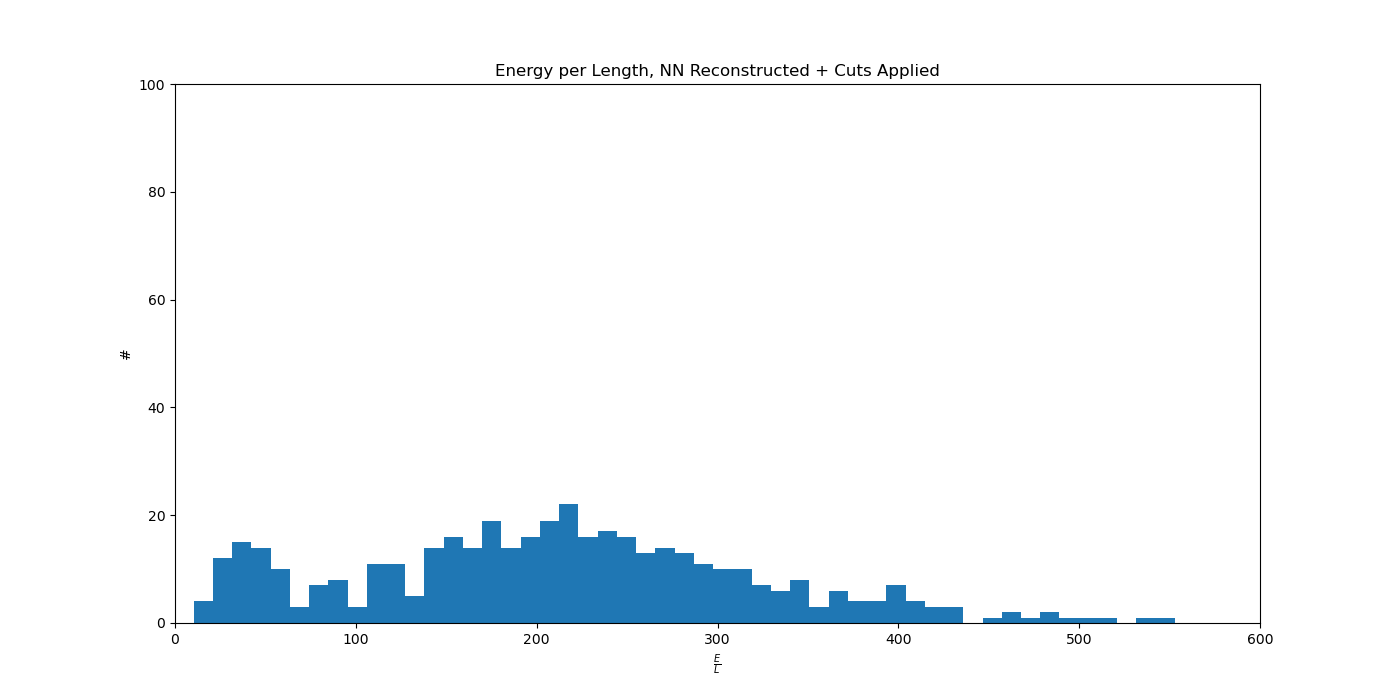

In [6]:
#NN + tests
cluster_densities, _ = getEnergies(classified, lambda x: all(x.tests[key] for key in ["length", "neighbours", "zone"]))
fig, ax = matplotlib.pyplot.subplots(1)
bin_heights, bin_borders, _ = ax.hist(cluster_densities, 60, log=False, density=False)
ax.set_title("Energy per Length, NN Reconstructed + Cuts Applied")
ax.set_xlabel(r"$\frac{E}{L}$")
ax.set_ylabel("#")
ax.set_ylim(0,100)
ax.set_xlim(0,600)
bin_centers = bin_borders[:-1] + numpy.diff(bin_borders) / 2
bin_heights, bin_centers = bin_heights[10:], bin_centers[10:]
print( sum(bin_heights*bin_centers) / sum(bin_heights) )
#print( sum(energy) / len(energy) )

fig.set_size_inches(14, 7)
matplotlib.pyplot.show()